In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.model_selection import KFold


In [ ]:
import os

# Set the search parameters
filename = 'draft3.xlsx'
search_path = '/content/drive/My Drive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Load the XLSX file into a DataFrame
df = pd.read_excel(file_path)

In [ ]:
df.head()


,Match_StartDate,Team1,Team2,Format,Balls_Remaining_after_winning,Toss_by_Team1,Bat_by_Team1,Ground,Match_Result,Margin,Ground_Country,Venue
0,2019-06-06,Australia,West Indies,ODI,NaN,lost,1st,Nottingham,won,15 runs,England,Neutral
1,2019-06-03,Pakistan,England,ODI,NaN,lost,1st,Nottingham,won,14 runs,England,Away
2,2016-08-30,England,Pakistan,ODI,NaN,won,1st,Nottingham,won,169 runs,England,Home
3,2017-09-24,England,West Indies,ODI,NaN,lost,1st,Bristol,won,124 runs,England,Home
4,2013-06-05,England,New Zealand,ODI,NaN,lost,1st,Nottingham,won,34 runs,England,Home


In [ ]:
#Checking how many rows have values in 'Balls_Remaining_after_winning' column
pd.value_counts(df['Balls_Remaining_after_winning'])

2.0      118
4.0       89
6.0       89
1.0       85
7.0       79
        ... 
187.0      1
158.0      1
149.0      1
167.0      1
133.0      1
Name: Balls_Remaining_after_winning, Length: 180, dtype: int64

In [ ]:
#Checking how many rows have values in 'Margin' column
pd.value_counts(df['Margin'])

7 wickets         430
6 wickets         420
-                 354
5 wickets         343
8 wickets         332
                 ... 
166 runs            2
inns & 15 runs      2
145 runs            2
175 runs            1
255 runs            1
Name: Margin, Length: 359, dtype: int64

In [ ]:
#Checking how many rows have values in 'Ground' column
pd.value_counts(df['Ground'])

Mirpur            326
Harare            238
Dubai (DSC)       204
Colombo (RPS)     168
Abu Dhabi         151
                 ... 
Schiedam            2
Brabourne           2
Raipur              2
Toronto             1
Tolerance Oval      1
Name: Ground, Length: 140, dtype: int64

In [ ]:
#Dropping columns
df.drop('Match_StartDate', inplace=True, axis=1)
df.drop('Margin', inplace=True, axis=1)
df.drop('Balls_Remaining_after_winning', inplace=True, axis=1)
df.drop('Ground', inplace=True, axis=1)

In [ ]:
#Removing insignificant teams in 'Team2' column
df = df[(df['Team2'] != 'Cameroon')]
df = df[(df['Team2'] != 'Canada')]
df = df[(df['Team2'] != 'Hong Kong')]
df = df[(df['Team2'] != 'Oman')]
df = df[(df['Team2'] != 'U.A.E.')]
df = df[(df['Team2'] != 'P.N.G.')]
df = df[(df['Team2'] != 'U.S.A.')]
df = df[(df['Team2'] != 'Nepal')]
df = df[(df['Team2'] != 'Namibia')]
df = df[(df['Team2'] != 'Malawi')]
df = df[(df['Team2'] != 'Uganda')]
df = df[(df['Team2'] != 'Ghana')]
df = df[(df['Team2'] != 'Nigeria')]
df = df[(df['Team2'] != 'World-XI')]
df = df[(df['Team2'] != 'Lesotho')]
df = df[(df['Team2'] != 'Malaysia')]
df = df[(df['Team2'] != 'ICC World XI')]
df = df[(df['Team2'] != 'Singapore')]
df = df[(df['Team2'] != 'Jersey')]
df = df[(df['Team2'] != 'Bermuda')]
df = df[(df['Team2'] != 'Tanzania')]
df = df[(df['Team2'] != 'St Helena')]
df = df[(df['Team2'] != 'Mali')]
df = df[(df['Team2'] != 'Rwanda')]
df = df[(df['Team2'] != 'Botswana')]
df = df[(df['Team2'] != 'Seychelles')]

In [ ]:
# replace "st", "nd", "rd", or "th" with an empty string
df['Bat_by_Team1'] = df['Bat_by_Team1'].str.replace('st|nd', '')

# convert the column to a numeric data type
df['Bat_by_Team1'] = pd.to_numeric(df['Bat_by_Team1'])

<ipython-input-30-aaff549ac98c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Bat_by_Team1'] = df['Bat_by_Team1'].str.replace('st|nd', '')


In [ ]:
new_order = ['Team1', 'Team2', 'Format', 'Toss_by_Team1', 'Bat_by_Team1', 'Ground_Country', 'Venue', 'Match_Result']
df = df.reindex(columns=new_order)

In [ ]:
df['Team1'].unique()

array(['Australia', 'Pakistan', 'England', 'South Africa', 'India',
       'New Zealand', 'Sri Lanka', 'Bangladesh', 'West Indies',
       'Afghanistan', 'Zimbabwe', 'Scotland', 'Netherlands', 'Kenya'],
      dtype=object)

In [ ]:
df['Team2'].unique()

array(['West Indies', 'England', 'Pakistan', 'New Zealand', 'Bangladesh',
       'Australia', 'India', 'Afghanistan', 'South Africa', 'Sri Lanka',
       'Ireland', 'Kenya', 'Netherlands', 'Zimbabwe', 'Scotland'],
      dtype=object)

In [ ]:
df['Format'].unique()

array(['ODI', 'T20I', 'Test'], dtype=object)

In [ ]:
df['Venue'].unique()

array(['Neutral', 'Away', 'Home'], dtype=object)

In [ ]:
df['Match_Result'].unique()

array(['won', 'lost', 'draw', 'n/r', 'tied'], dtype=object)

In [ ]:
df = df.drop(df[df.Match_Result == 'n/r'].index)

In [ ]:
df['Match_Result'] = df['Match_Result'].str.replace('draw', 'tied')

<Axes: ylabel='Format'>

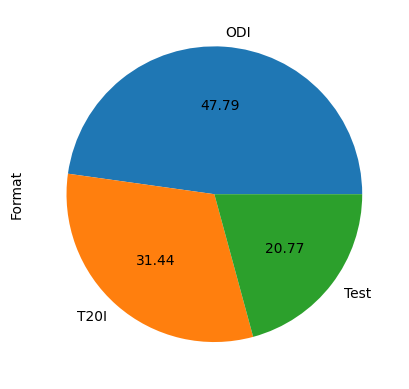

In [ ]:
df['Format'].value_counts ().plot(kind='pie',autopct='%.2f')

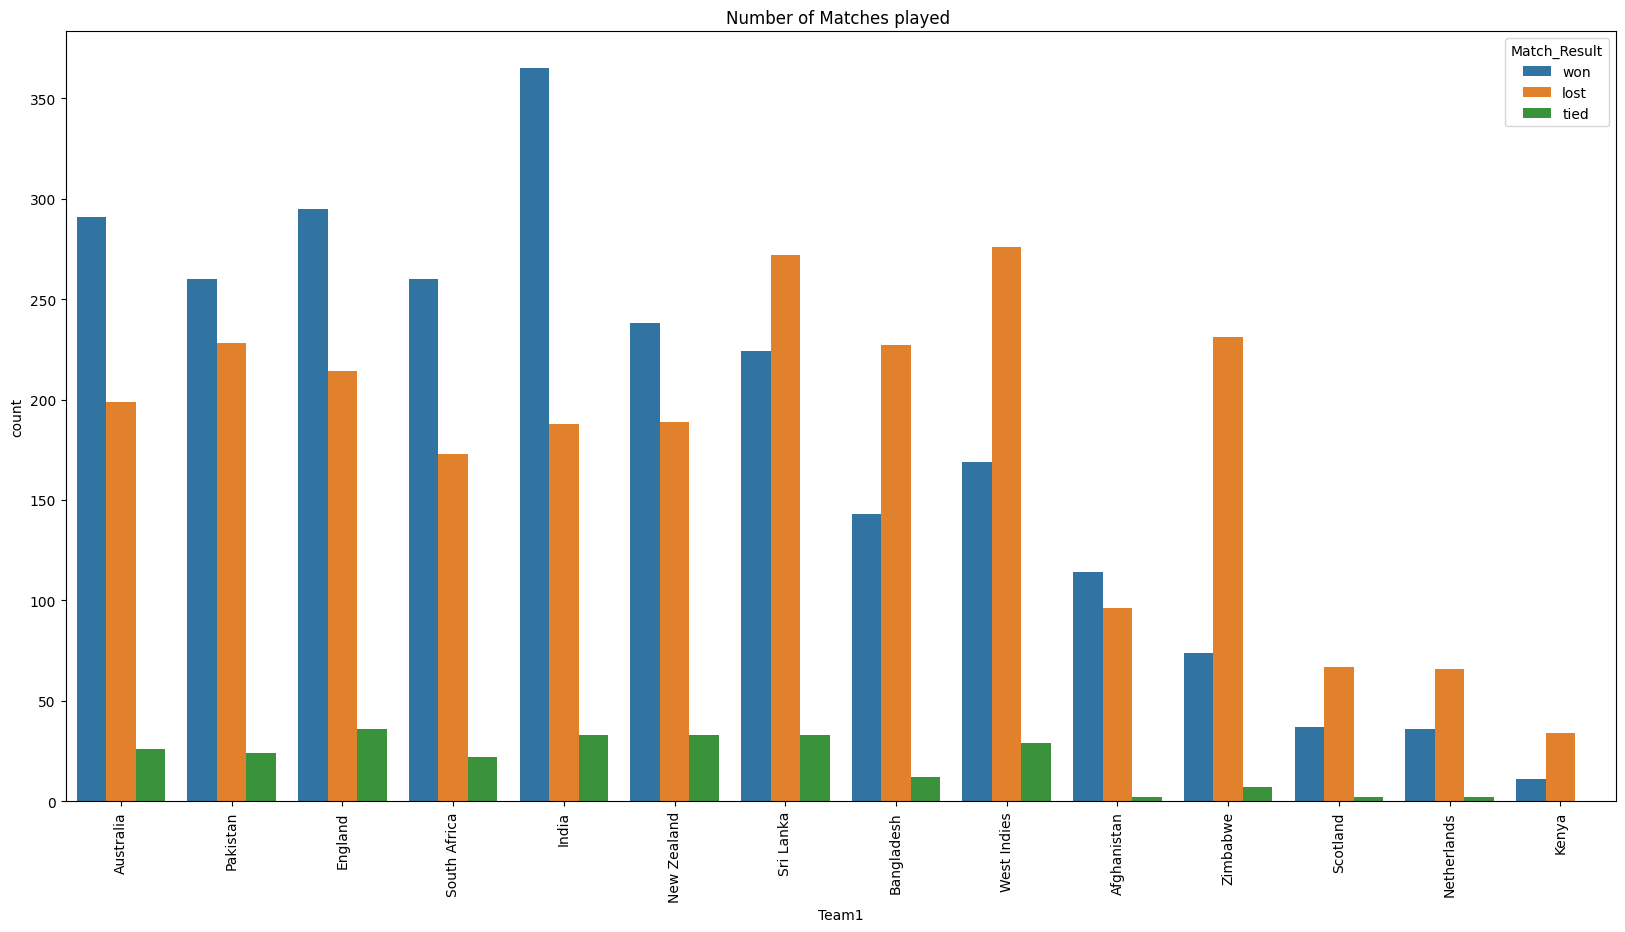

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="Team1", hue="Match_Result", data=df)
plt.xticks(rotation=90)
plt.title('Number of Matches played ')
plt.show()

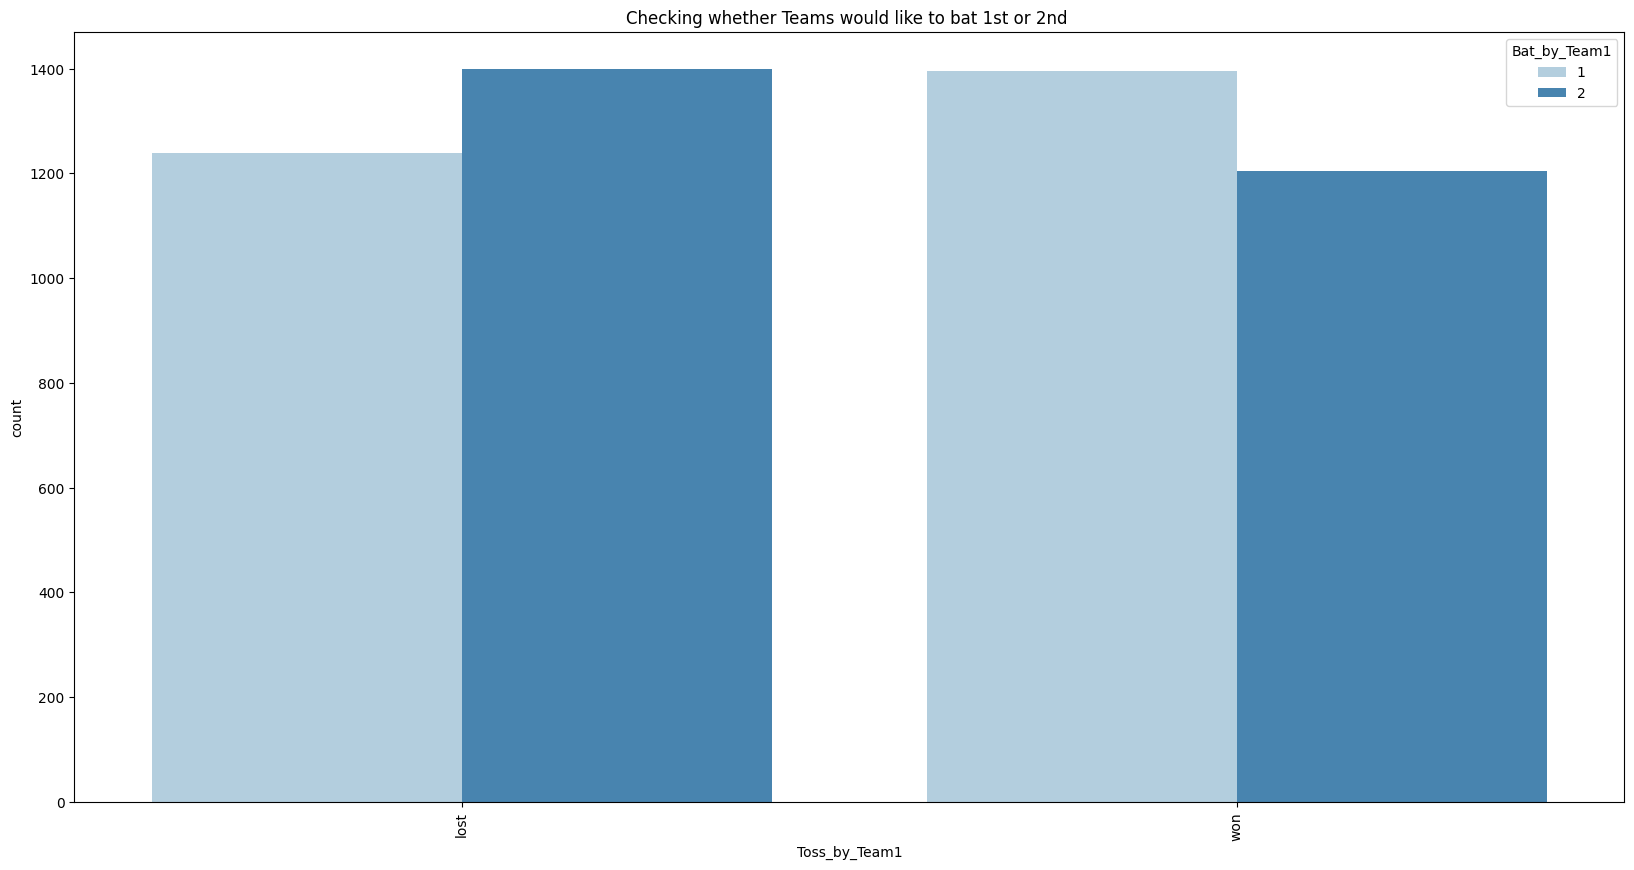

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="Toss_by_Team1", hue="Bat_by_Team1", data=df, palette="Blues")
plt.xticks(rotation=90)
plt.title('Checking whether Teams would like to bat 1st or 2nd ')
plt.show()

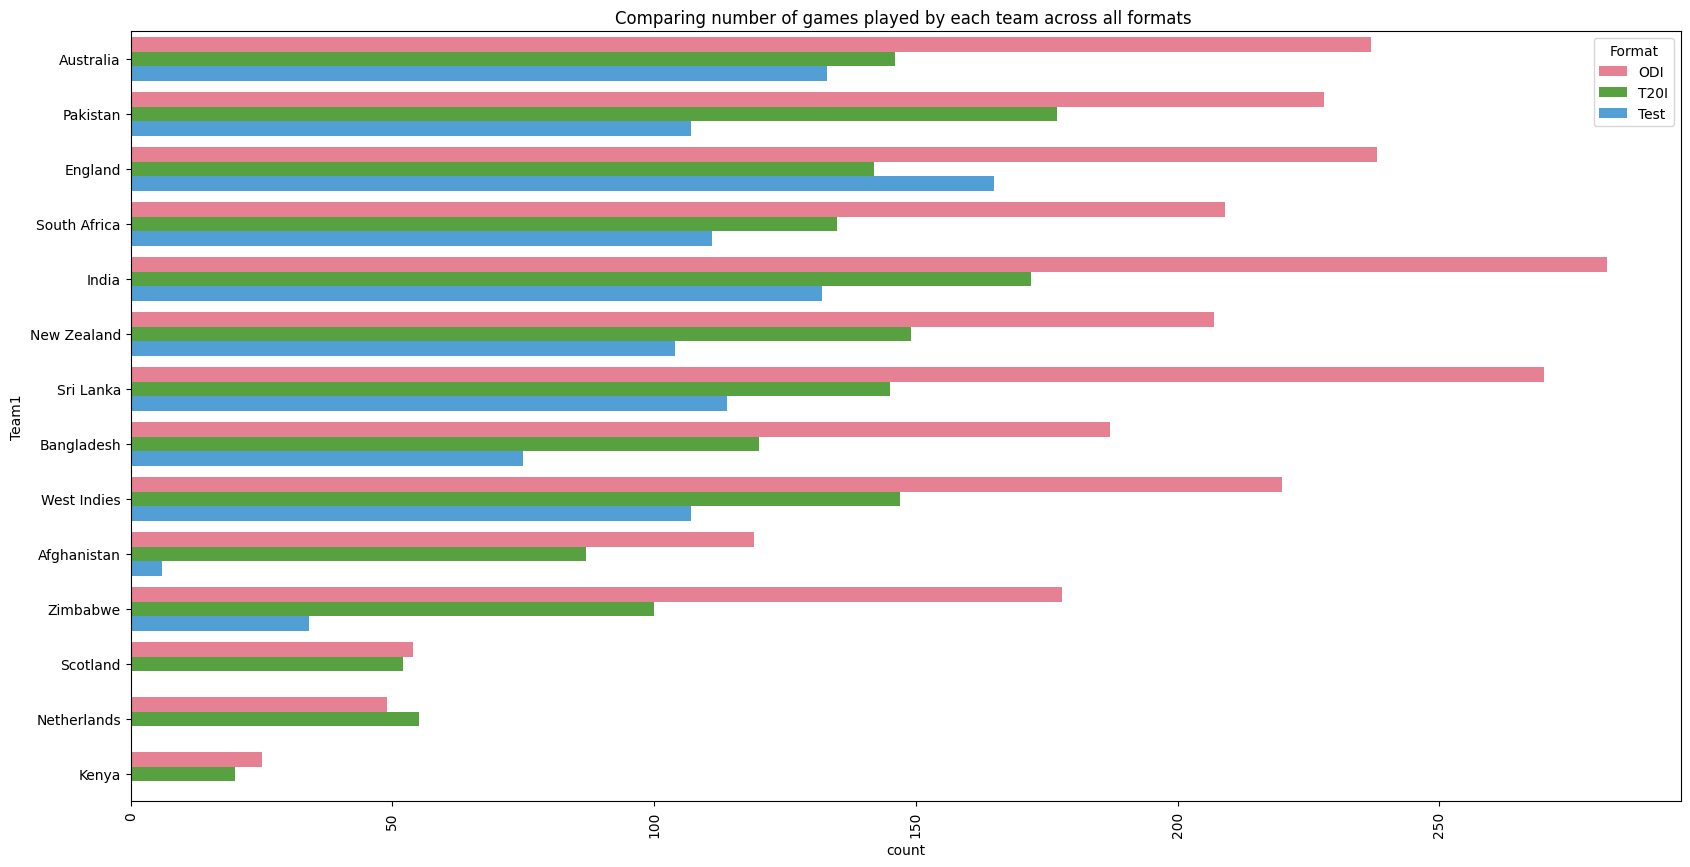

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(y="Team1", hue="Format", data=df, palette="husl")
plt.xticks(rotation=90)
plt.title('Comparing number of games played by each team across all formats ')
plt.show()

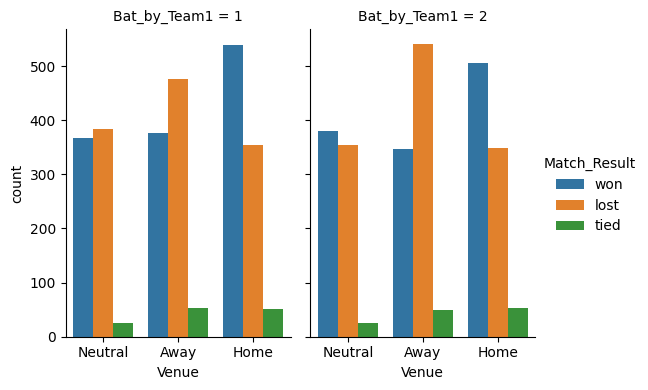

In [ ]:
sns.catplot(data = df, hue = "Match_Result",
            x="Venue", col = "Bat_by_Team1",
            kind = "count",
            aspect = 0.7, height = 4)
plt.show()

In [ ]:
print(df.isnull().sum())   # Check for missing values in each column

Team1             0
Team2             0
Format            0
Toss_by_Team1     0
Bat_by_Team1      0
Ground_Country    0
Venue             0
Match_Result      0
dtype: int64


In [ ]:
df

,Team1,Team2,Format,Toss_by_Team1,Bat_by_Team1,Ground_Country,Venue,Match_Result
0,Australia,West Indies,ODI,lost,1,England,Neutral,won
1,Pakistan,England,ODI,lost,1,England,Away,won
2,England,Pakistan,ODI,won,1,England,Home,won
3,England,West Indies,ODI,lost,1,England,Home,won
4,England,New Zealand,ODI,lost,1,England,Home,won
...,...,...,...,...,...,...,...,...
5573,India,Bangladesh,ODI,lost,2,Bangladesh,Away,won
5574,Sri Lanka,Zimbabwe,ODI,lost,2,Zimbabwe,Away,won
5575,India,Sri Lanka,ODI,lost,2,Sri Lanka,Away,won
5576,India,Bangladesh,ODI,won,2,Bangladesh,Away,won


In [ ]:
X = df[['Team1', 'Team2', 'Format', 'Toss_by_Team1', 'Bat_by_Team1', 'Ground_Country', 'Venue']]
y = df[['Match_Result']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,Team1,Team2,Format,Toss_by_Team1,Bat_by_Team1,Ground_Country,Venue
4115,New Zealand,South Africa,ODI,lost,2,New Zealand,Home
346,South Africa,India,ODI,won,1,South Africa,Home
2171,Afghanistan,Australia,T20I,won,2,Australia,Away
40,South Africa,England,ODI,won,1,England,Away
3162,England,West Indies,Test,won,2,England,Home
...,...,...,...,...,...,...,...
964,Pakistan,Australia,T20I,lost,1,Zimbabwe,Neutral
5529,South Africa,Australia,ODI,lost,2,South Africa,Home
4238,Zimbabwe,Pakistan,T20I,won,1,Pakistan,Away
240,Sri Lanka,South Africa,ODI,won,1,Sri Lanka,Home


In [ ]:
trf = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse=False,drop='first'),['Team1','Team2','Format', 'Ground_Country']),
    ('trf2',OrdinalEncoder (categories= [['Home', 'Neutral', 'Away']]), ['Venue']),
    ('trf3',OrdinalEncoder (categories= [['won', 'lost']]), ['Toss_by_Team1'])


]
,remainder='passthrough')

In [ ]:
# Transforming the data using the previously defined transformer
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Training the logistic regression model
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train_transformed, y_train)

# Making predictions on the test data
logreg_predictions = logreg_model.predict(X_test_transformed)

# Evaluating the model using accuracy score, precision score, and F1 score
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_precision = precision_score(y_test, logreg_predictions, average='weighted')
logreg_f1 = f1_score(y_test, logreg_predictions, average='weighted')

print("Accuracy : {:.2%}".format(logreg_accuracy))
print("Precision: {:.2%}".format(logreg_precision))
print("F1-score: {:.2%}".format(logreg_f1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 62.98%
Precision: 62.04%
F1-score: 61.85%


In [ ]:
# Training the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Making predictions on the test data
rf_predictions = rf_model.predict(X_test_transformed)

# Evaluating the model using accuracy score, precision score, and F1 score
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='macro')
rf_f1 = f1_score(y_test, rf_predictions, average='macro')

print("Accuracy : {:.2%}".format(rf_accuracy))
print("Precision: {:.2%}".format(rf_precision))
print("F1-score: {:.2%}".format(rf_f1))

<ipython-input-51-60ea4041c8f8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_transformed, y_train)


Accuracy : 59.06%
Precision: 49.77%
F1-score: 47.14%


In [ ]:
svm_model = SVC(probability=True)
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2', SVC(kernel='rbf', C=1.0, gamma='scale'))])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Team1', 'Team2', 'Format',
                                                   'Ground_Country']),
                                                 ('trf2',
                                                  OrdinalEncoder(categories=[['Home',
                                                                              'Neutral',
                                                                              'Away']]),
                                                  ['Venue']),
                                                 ('trf3',
                                                  OrdinalEncoder(categories=[['won',
                                                                              'lost']]),
                                                  ['Toss_by_Team1'])])),
                ('step2', SVC())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
# Making predictions on the test data
pipe_predictions = pipe.predict(X_test)

# Evaluating the model using accuracy score, precision score, and F1 score
pipe_accuracy = accuracy_score(y_test, pipe_predictions)
pipe_precision = precision_score(y_test, pipe_predictions, average='weighted')
pipe_f1 = f1_score(y_test, pipe_predictions, average='weighted')

print("Accuracy : {:.2%}".format(pipe_accuracy))
print("Precision: {:.2%}".format(pipe_precision))
print("F1-score: {:.2%}".format(pipe_f1))

Accuracy : 63.55%
Precision: 60.64%
F1-score: 61.95%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assuming X_test and y_test are the test set data
# Fitting the models
logreg_model.fit(X_train_transformed, y_train)
rf_model.fit(X_train_transformed, y_train)
svm_model.fit(X_train_transformed, y_train)

# Getting predictions on test set
logreg_preds = logreg_model.predict(X_test_transformed)
rfc_preds = rf_model.predict(X_test_transformed)
svm_preds = svm_model.predict(X_test_transformed)


# Convert the predictions to binary format
log_pred_binary = [1 if x == 'won' else 0 for x in logreg_preds]
rfc_pred_binary = [1 if x == 'won' else 0 for x in rfc_preds]
svm_pred_binary = [1 if x == 'won' else 0 for x in svm_preds]


# Get only the first 10 predictions
log_pred_binary = log_pred_binary[:10]
rfc_pred_binary = rfc_pred_binary[:10]
svm_pred_binary = svm_pred_binary[:10]


# Printing the predictions for each algorithm
print("Logistic Regression predictions:", log_pred_binary)
print("Random Forest predictions:", rfc_pred_binary)
print("SVM predictions:", svm_pred_binary)







/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-56-7285e1d412da>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_transformed, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression predictions: [1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
Random Forest predictions: [1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
SVM predictions: [1, 0, 1, 1, 1, 1, 1, 0, 1, 1]


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

# Creating contingency table for comparing Logistic Regression and SVM classifiers
log_pred_binary = [1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
svm_pred_binary = [1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
cont_table = [[sum([1 for i in range(len(log_pred_binary)) if log_pred_binary[i]==1 and svm_pred_binary[i]==1]),
               sum([1 for i in range(len(log_pred_binary)) if log_pred_binary[i]==1 and svm_pred_binary[i]==0])],
              [sum([1 for i in range(len(log_pred_binary)) if log_pred_binary[i]==0 and svm_pred_binary[i]==1]),
               sum([1 for i in range(len(log_pred_binary)) if log_pred_binary[i]==0 and svm_pred_binary[i]==0])]]

# Printing the contingency table
print("Contingency table:")
print(cont_table)

# Calculating McNemar's test
result = mcnemar(cont_table)

# Printing the results
print("\nMcNemar's test:")
print("Statistic = ", result.statistic)
print("p-value = ", result.pvalue)


Contingency table:
[[7, 0], [1, 2]]

McNemar's test:
Statistic =  0.0
p-value =  1.0


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

# Creating contingency table for comparing Random Forest and SVM classifiers
rfc_pred_binary = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
svm_pred_binary = [1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
cont_table = [[sum([1 for i in range(len(rfc_pred_binary)) if rfc_pred_binary[i]==1 and svm_pred_binary[i]==1]),
               sum([1 for i in range(len(rfc_pred_binary)) if rfc_pred_binary[i]==1 and svm_pred_binary[i]==0])],
              [sum([1 for i in range(len(rfc_pred_binary)) if rfc_pred_binary[i]==0 and svm_pred_binary[i]==1]),
               sum([1 for i in range(len(rfc_pred_binary)) if rfc_pred_binary[i]==0 and svm_pred_binary[i]==0])]]

# Printing the contingency table
print("Contingency table:")
print(cont_table)

# Calculating McNemar's test
result = mcnemar(cont_table)

# Printing the results
print("\nMcNemar's test:")
print("Statistic = ", result.statistic)
print("p-value = ", result.pvalue)


Contingency table:
[[7, 0], [1, 2]]

McNemar's test:
Statistic =  0.0
p-value =  1.0


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix', cm)

confusion matrix [[334   0 185]
 [ 22   0  30]
 [145   0 332]]


In [ ]:
pickle.dump(pipe,open('pipe.pkl','wb'))